In [1]:
# import library yang diperlukan
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv('dataset_281.csv')
X = df[['jarak', 'kecepatan', 'skor_hambatan']].values
y = df['waktu']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DISTRIBUSI DATA

              lat         lng        waktu       jarak   kecepatan  \
count  281.000000  281.000000   281.000000  281.000000  281.000000   
mean    -6.920222  107.636950   676.868327    3.000873   16.647993   
std      0.013957    0.035060   436.949728    1.936592    4.032413   
min     -6.947000  107.590044    10.000000    0.030423    7.748764   
25%     -6.928543  107.603522   307.000000    1.427841   14.139730   
50%     -6.916071  107.630193   578.000000    2.653804   16.529907   
75%     -6.908107  107.666919  1014.000000    4.448233   18.323638   
max     -6.902194  107.713275  2034.000000    7.515306   40.452163   

       skor_hambatan  
count     281.000000  
mean       23.478648  
std        17.458644  
min         1.100000  
25%         7.400000  
50%        19.800000  
75%        37.200000  
max        69.500000  


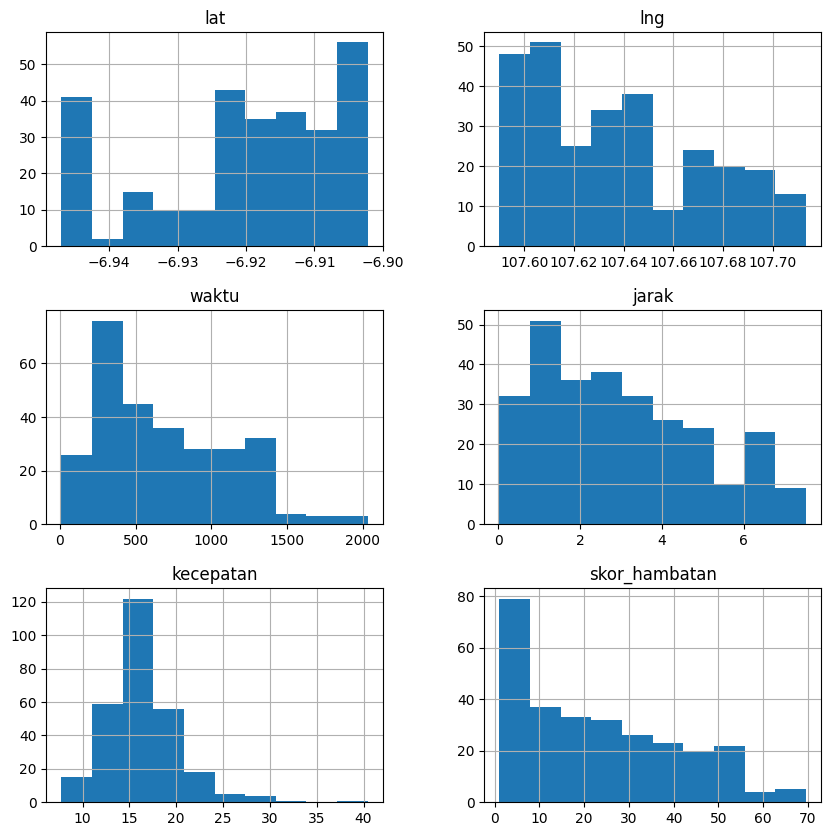

Jumlah outlier: 11


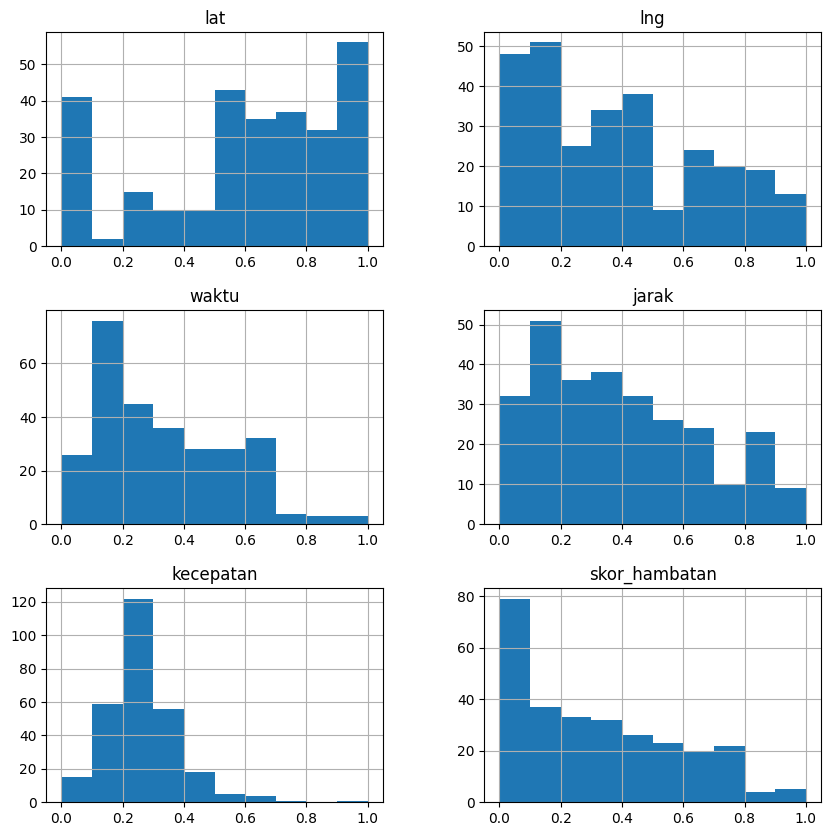

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset
data = df

# Menampilkan ringkasan statistik deskriptif
print(data.describe())

# Menampilkan histogram untuk setiap fitur
data.hist(figsize=(10, 10))
plt.show()

# Mendeteksi outlier dengan Interquartile Range (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print("Jumlah outlier:", outliers.sum())

# Menyimpan dataset tanpa outlier
data_no_outliers = data[~outliers]

# Standarisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Menampilkan histogram setelah normalisasi
pd.DataFrame(data_normalized, columns=data.columns).hist(figsize=(10, 10))
plt.show()



# HYPEPARAMETER TUNNING

In [6]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# Pilihan hyperparameter untuk n_neighbors dan weights
n_neighbors_options = [2, 3, 5, 7, 9, 11]
weights_options = ['uniform', 'distance']

# Untuk menyimpan hasil
results = {}

# Melakukan manual search dengan menguji setiap kombinasi hyperparameter
for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        # Membuat pipeline dengan scaling dan model KNN
        knn_model = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights))
        ])

        # Latih model
        knn_model.fit(X_train, y_train)

        # Prediksi
        y_pred = knn_model.predict(X_test)

        # Hitung RMSE
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        # Hitung MAPE
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100

        # Hitung R²
        r2 = r2_score(y_test, y_pred)

        # Simpan hasil dalam dictionary
        results[(n_neighbors, weights)] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

        print(f"n_neighbors: {n_neighbors}, weights: {weights} - MAPE: {mape:.2f}%, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Tentukan kombinasi hyperparameter terbaik berdasarkan RMSE
best_params_rmse = min(results, key=lambda x: results[x]['RMSE'])
best_rmse = results[best_params_rmse]['RMSE']
best_mape_rmse = results[best_params_rmse]['MAPE']
best_r2_rmse = results[best_params_rmse]['R²']

# Tentukan kombinasi hyperparameter terbaik berdasarkan MAPE
best_params_mape = min(results, key=lambda x: results[x]['MAPE'])
best_rmse_mape = results[best_params_mape]['RMSE']
best_mape = results[best_params_mape]['MAPE']
best_r2_mape = results[best_params_mape]['R²']

# Tentukan kombinasi hyperparameter terbaik berdasarkan R²
best_params_r2 = max(results, key=lambda x: results[x]['R²'])
best_rmse_r2 = results[best_params_r2]['RMSE']
best_mape_r2 = results[best_params_r2]['MAPE']
best_r2 = results[best_params_r2]['R²']

print(f"\nBest Hyperparameters based on RMSE: n_neighbors = {best_params_rmse[0]}, weights = {best_params_rmse[1]} with RMSE = {best_rmse:.4f}, MAPE = {best_mape_rmse:.4f}, R² = {best_r2_rmse:.4f}")
print(f"Best Hyperparameters based on MAPE: n_neighbors = {best_params_mape[0]}, weights = {best_params_mape[1]} with RMSE = {best_rmse_mape:.4f}, MAPE = {best_mape:.4f}, R² = {best_r2_mape:.4f}")
print(f"Best Hyperparameters based on R²: n_neighbors = {best_params_r2[0]}, weights = {best_params_r2[1]} with RMSE = {best_rmse_r2:.4f}, MAPE = {best_mape_r2:.4f}, R² = {best_r2:.4f}")


n_neighbors: 2, weights: uniform - MAPE: 16.80%, RMSE: 51.7811, R²: 0.9820
n_neighbors: 2, weights: distance - MAPE: 15.66%, RMSE: 47.6680, R²: 0.9848
n_neighbors: 3, weights: uniform - MAPE: 30.44%, RMSE: 50.8921, R²: 0.9826
n_neighbors: 3, weights: distance - MAPE: 18.99%, RMSE: 41.2155, R²: 0.9886
n_neighbors: 5, weights: uniform - MAPE: 31.83%, RMSE: 52.6177, R²: 0.9814
n_neighbors: 5, weights: distance - MAPE: 21.10%, RMSE: 41.3924, R²: 0.9885
n_neighbors: 7, weights: uniform - MAPE: 34.93%, RMSE: 60.9110, R²: 0.9751
n_neighbors: 7, weights: distance - MAPE: 23.15%, RMSE: 44.4817, R²: 0.9867
n_neighbors: 9, weights: uniform - MAPE: 35.91%, RMSE: 64.3776, R²: 0.9722
n_neighbors: 9, weights: distance - MAPE: 24.68%, RMSE: 46.8493, R²: 0.9853
n_neighbors: 11, weights: uniform - MAPE: 43.46%, RMSE: 70.1456, R²: 0.9670
n_neighbors: 11, weights: distance - MAPE: 29.16%, RMSE: 48.1548, R²: 0.9844

Best Hyperparameters based on RMSE: n_neighbors = 3, weights = distance with RMSE = 41.2155

# MODEL KNN

Mean Absolute Percentage Error (MAPE): 18.99%
Root Mean Squared Error (RMSE): 41.215502064774896
R² KNN: 0.9886


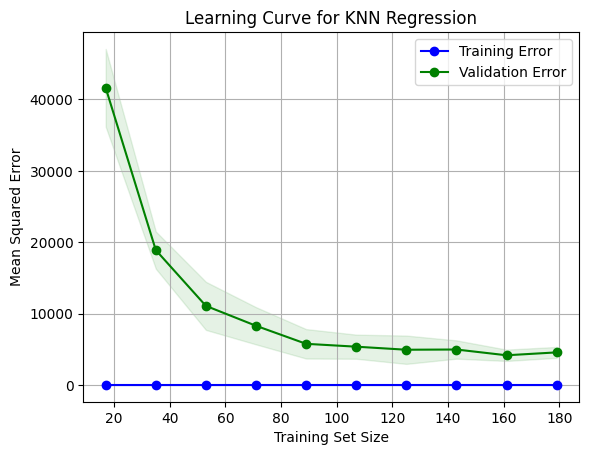

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Gunakan parameter optimal dari GridSearchCV pada Kodingan 1
n_neighbors = 3
weights = 'distance'

# Inisialisasi model KNN dengan parameter optimal dan scaler
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights))
])

# Latih model dengan data training
knn.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred_knn = knn.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
r2 = r2_score(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn) * 100  # MAPE dalam persentase

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R² KNN: {r2:.4f}")

# Membuat learning curve
train_sizes, train_scores, valid_scores = learning_curve(knn, X_train, y_train, cv=5,
                                                         scoring='neg_mean_squared_error',
                                                         train_sizes=np.linspace(0.1, 1.0, 10))

# Mengubah nilai menjadi positif
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
valid_scores_mean = -valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='green', label='Validation Error')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for KNN Regression')
plt.legend(loc='best')
plt.grid()
plt.show()


# MODEL LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Layer, Reshape
from tensorflow.keras import backend as K

class ScalingLayer(Layer):
    def __init__(self, **kwargs):
        super(ScalingLayer, self).__init__(**kwargs)
        self.scaler = StandardScaler()

    def build(self, input_shape):
        self.scaler.fit(K.transpose(K.reshape(self.add_weight(name='mean',
                                                              shape=(input_shape[-1],),
                                                              initializer='zeros',
                                                              trainable=False),
                                              (-1, input_shape[-1]))))
        self.add_weight(name='std',
                        shape=(input_shape[-1],),
                        initializer='ones',
                        trainable=False)
        super(ScalingLayer, self).build(input_shape)

    def call(self, inputs, training=None):
        if training:
            mean = K.mean(inputs, axis=0, keepdims=True)
            std = K.std(inputs, axis=0, keepdims=True)
            self.variables[0].assign(K.reshape(mean, (-1,)))
            self.variables[1].assign(K.reshape(std, (-1,)))
        return (inputs - self.variables[0]) / self.variables[1]

# Fungsi untuk membuat model LSTM
def create_lstm_model(input_shape, units=50, dropout_rate=0.2):
    model = Sequential()
    # Correct the input shape for the Reshape layer
    model.add(Reshape((1, input_shape[0]), input_shape=input_shape)) # Reshape data to 3D for LSTM
    model.add(ScalingLayer())  # Tambahkan ScalingLayer after reshaping
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and fit the LSTM model
lstm = create_lstm_model((X_train.shape[1],)) # Pass the correct input shape
lstm.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) # Adjust epochs and batch_size as needed

# Make predictions
y_pred = lstm.predict(X_test) # No need to reshape here


# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R²: {r2}")


2/2 [==============================] - 1s 7ms/step
Mean Absolute Error: 63.419733817117255
Mean Squared Error: 5660.5297426685165
Root Mean Squared Error: 75.2364920943854
R²: 0.9620388209737263


# TES MODEL

In [ ]:
import datetime

uji_lstm = pd.read_csv('data_uji (2).csv')
uji_lstm = uji_lstm.loc[:, ['jarak', 'hambatan', 'waktu']]

for i in range(0, len(uji_lstm)):
  waktu_tempuh = lstm.predict([[uji_lstm.at[i, 'jarak'], 16, uji_lstm.at[i, 'hambatan']]])
  waktu_tempuh_scalar = waktu_tempuh.item()
  integer_part = int(waktu_tempuh_scalar)
  microsecond_part = int((waktu_tempuh_scalar - integer_part) * 1e6)
  waktu_tempuh_timedelta = datetime.timedelta(seconds=integer_part, microseconds=microsecond_part)
  epoch = datetime.datetime(2024, 1, 1)
  waktu_tempuh_datetime = epoch + waktu_tempuh_timedelta
  waktu = waktu_tempuh_datetime.strftime("%H:%M:%S")

  uji_lstm.at[i, 'estimasi'] = waktu_tempuh / 60
  uji_lstm.at[i, 'estimasi(date time)'] = waktu

print(uji_lstm)

1/1 [==============================] - 0s 61ms/step
    jarak  hambatan  waktu   estimasi estimasi(date time)
0     1.3       3.3   3.00   3.566127            00:03:33
1     2.6       4.8   6.25   6.490116            00:06:29
2     4.4       6.2  10.50  13.641530            00:13:38
3     2.5       2.9   6.25   6.203714            00:06:12
4     5.2       8.0  11.50  16.926189            00:16:55
5     2.9      18.0   6.50   7.453428            00:07:27
6     4.6      40.5  10.50  15.132556            00:15:07
7     1.5      36.3   5.25   3.731427            00:03:43
8     3.2      56.1  11.50   8.753601            00:08:45
9     4.1      59.2  12.75  12.855158            00:12:51
10    2.1      30.5   6.00   4.989622            00:04:59
11    3.3      33.2  10.50   9.088789            00:09:05
12    4.2      50.0  12.25  13.339011            00:13:20
13    6.8       3.0  16.75  21.081059            00:21:04
14    3.5       8.0   8.00   9.776181            00:09:46


In [8]:
import datetime

uji_knn = pd.read_csv('data_uji (2).csv')
uji_knn = uji_knn.loc[:, ['jarak', 'hambatan', 'waktu']]

for i in range(0, len(uji_knn)):
  waktu_tempuh = knn.predict([[uji_knn.at[i, 'jarak'], 16, uji_knn.at[i, 'hambatan']]])
  uji_knn.at[i, 'estimasi'] = waktu_tempuh / 60
  waktu_tempuh_scalar = waktu_tempuh.item()
  integer_part = int(waktu_tempuh_scalar)
  microsecond_part = int((waktu_tempuh_scalar - integer_part) * 1e6)
  waktu_tempuh_timedelta = datetime.timedelta(seconds=integer_part, microseconds=microsecond_part)
  epoch = datetime.datetime(2024, 1, 1)
  waktu_tempuh_datetime = epoch + waktu_tempuh_timedelta
  waktu = waktu_tempuh_datetime.strftime("%H:%M:%S")

  uji_knn.at[i, 'estimasi(date time)'] = waktu

print(uji_knn)

    jarak  hambatan  waktu   estimasi estimasi(date time)
0     1.3       3.3   3.00   4.484985            00:04:29
1     2.6       4.8   6.25  10.955452            00:10:57
2     4.4       6.2  10.50  16.393325            00:16:23
3     2.5       2.9   6.25  10.468493            00:10:28
4     5.2       8.0  11.50  18.600000            00:18:36
5     2.9      18.0   6.50   9.948143            00:09:56
6     4.6      40.5  10.50  15.469709            00:15:28
7     1.5      36.3   5.25   5.805837            00:05:48
8     3.2      56.1  11.50  13.216768            00:13:13
9     4.1      59.2  12.75  16.541964            00:16:32
10    2.1      30.5   6.00   6.005904            00:06:00
11    3.3      33.2  10.50  13.633333            00:13:38
12    4.2      50.0  12.25  15.247143            00:15:14
13    6.8       3.0  16.75  22.237113            00:22:14
14    3.5       8.0   8.00  13.414635            00:13:24


In [9]:
import datetime

uji_manual = pd.read_csv('data_uji (2).csv')
uji_manual = uji_manual.loc[:, ['jarak', 'waktu']]

for i in range(0, len(uji_manual)):
  waktu_tempuh = (uji_manual.at[i, 'jarak'] / 16) * 3600
  waktu_tempuh_menit = waktu_tempuh / 60
  uji_manual.at[i, 'estimasi'] = waktu_tempuh_menit

print(uji_manual)

    jarak  waktu  estimasi
0     1.3   3.00     4.875
1     2.6   6.25     9.750
2     4.4  10.50    16.500
3     2.5   6.25     9.375
4     5.2  11.50    19.500
5     2.9   6.50    10.875
6     4.6  10.50    17.250
7     1.5   5.25     5.625
8     3.2  11.50    12.000
9     4.1  12.75    15.375
10    2.1   6.00     7.875
11    3.3  10.50    12.375
12    4.2  12.25    15.750
13    6.8  16.75    25.500
14    3.5   8.00    13.125


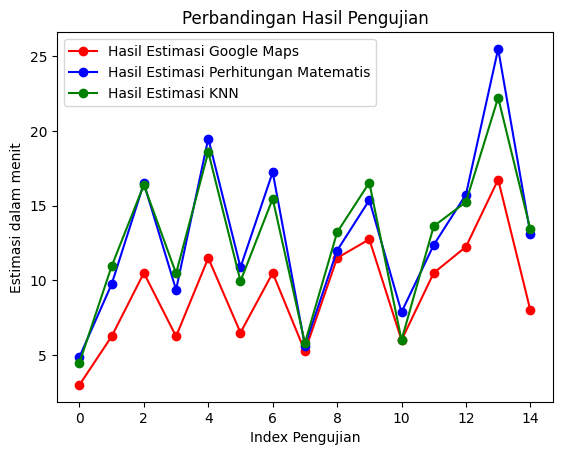

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(uji_knn.index, uji_knn['waktu'], 'o-', color='r', label='Hasil Estimasi Google Maps')
plt.plot(uji_manual.index, uji_manual['estimasi'], 'o-', color='b', label='Hasil Estimasi Perhitungan Matematis')
plt.plot(uji_knn.index, uji_knn['estimasi'], 'o-', color='g', label='Hasil Estimasi KNN')
# plt.plot(uji_lstm.index, uji_lstm['estimasi'], 'o-', color='y', label='Hasil Estimasi LSTM')
plt.xlabel('Index Pengujian')
plt.ylabel('Estimasi dalam menit')
plt.title('Perbandingan Hasil Pengujian')
plt.legend(loc='best')
plt.show()

# Download Model


In [ ]:
!pip install skl2onnx onnx tf2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 3.20.2 which is incompatible.


In [ ]:
import joblib
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Menyimpan model ke dalam file bernama 'knn_model.pkl'
joblib.dump(knn, 'knn_model.pkl')

# Muat model yang sudah disimpan
knn = joblib.load('knn_model.pkl')

# Tentukan tipe input untuk model
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Konversi model ke format ONNX
onnx_model = convert_sklearn(knn, initial_types=initial_type)

# Simpan model ONNX ke file
with open("knn_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


In [ ]:
import tensorflow as tf
import tf2onnx
spec = tf.TensorSpec([None, X_train.shape[1]], tf.float32, name='float_input')
onnx_model, _ = tf2onnx.convert.from_keras(lstm, input_signature=[spec])
with open("lstm_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())